In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=2, style="whitegrid", palette="bright")

import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# No. flipping until prediction changed

------- mnist : SEQ 1 --------
architecture              s2      s3  deep_4l  convdeep_4l
method                                                    
guided_backprop       3.0419  3.7064   3.9644       3.0261
lrp_deep_taylor       3.3513  3.0475   3.8442       3.0159
lrp_deep_taylor_f025  4.1138  3.0622   3.8734       2.9884
random                7.6425  7.6155   8.1445       8.7237
sensitivity           3.5936  3.6526   3.9390       3.1877
------- mnist : SEQ 4 --------
architecture              s2      s3  deep_4l  convdeep_4l
method                                                    
guided_backprop       4.6898  4.4534   4.9407       3.4629
lrp_deep_taylor       7.8061  3.6050   3.3560       3.6455
lrp_deep_taylor_f025  4.6504  3.5531   3.3455       3.2710
random                7.6523  8.2233   7.7192       8.4032
sensitivity           3.9174  4.1361   4.7847       3.8321
------- mnist : SEQ 7 --------
architecture              s2      s3  deep_4l  convdeep_4l
method                

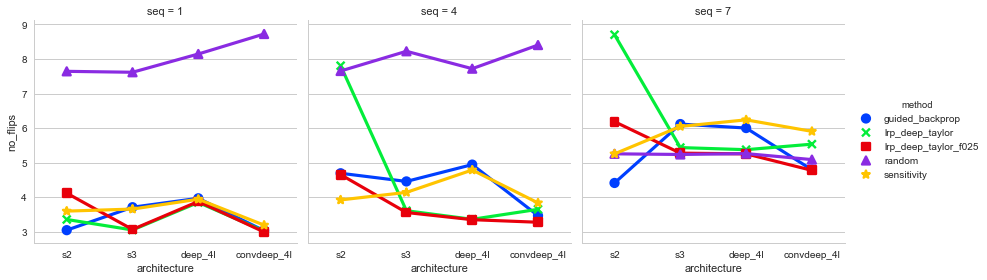

In [45]:
def read(stat, dataset, seqs=[1,4,7]):
    df = pd.read_csv('../stats/%s-%s.csv' % (stat, dataset))
    def architecture_idx(a):
        if a == 's2':
            return 1
        elif a == 's3':
            return 2
        elif a =='deep_4l':
            return 3
        elif a == 'convdeep_4l':
            return 4
        
    df['architecture_idx'] = df['architecture'].apply(architecture_idx)
    df = df.sort_values(by=['seq','architecture_idx', 'method'])

    sns.factorplot(x="architecture", y="no_flips", col='seq', hue="method", data=df, markers=['o', 'x', 's', '^', '*', 'p'])
    for i in seqs:
        d = df[df.seq == i].pivot( index='method', columns="architecture", values='no_flips')[['s2', 's3', 'deep_4l', 'convdeep_4l']]
        print('------- %s : SEQ %d --------' % (dataset, i))
        print(d)

read('no-flip', 'mnist')

------- fashion-mnist : SEQ 1 --------
architecture              s2      s3  deep_4l  convdeep_4l
method                                                    
guided_backprop       3.7520  3.6960   3.7725       4.9821
lrp_deep_taylor       4.0158  4.3223   4.3868       5.1275
lrp_deep_taylor_f025  4.6110  4.3415   4.4091       4.9800
lrp_deep_taylor_f050  4.3247  4.3333   4.3991       5.0236
random                5.7957  6.0409   6.3051       8.5569
sensitivity           3.9968  3.6976   3.7626       5.6941
------- fashion-mnist : SEQ 4 --------
architecture              s2      s3  deep_4l  convdeep_4l
method                                                    
guided_backprop       6.4540  4.5381   5.7973       4.1795
lrp_deep_taylor       7.5502  4.4362   5.2792       4.9524
lrp_deep_taylor_f025  7.2478  4.2989   5.2705       4.1041
lrp_deep_taylor_f050  7.5298  4.3367   5.2848       4.3510
random                6.4923  6.0664   6.8023       7.4029
sensitivity           5.4877  3.9984 

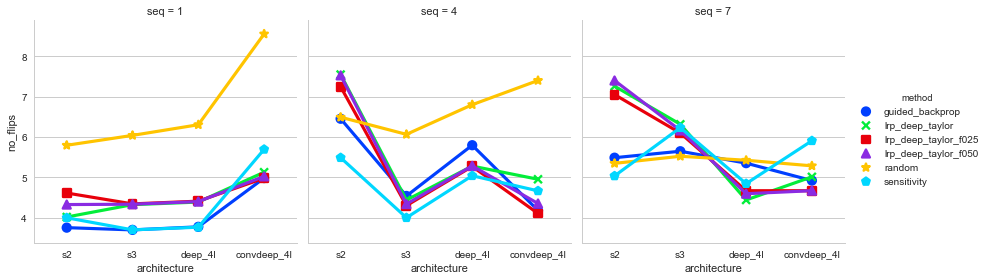

In [46]:
read('no-flip', 'fashion-mnist')

# AUC

getting data from ../stats/aopc-mnist-using-minus_one-flip.pkl


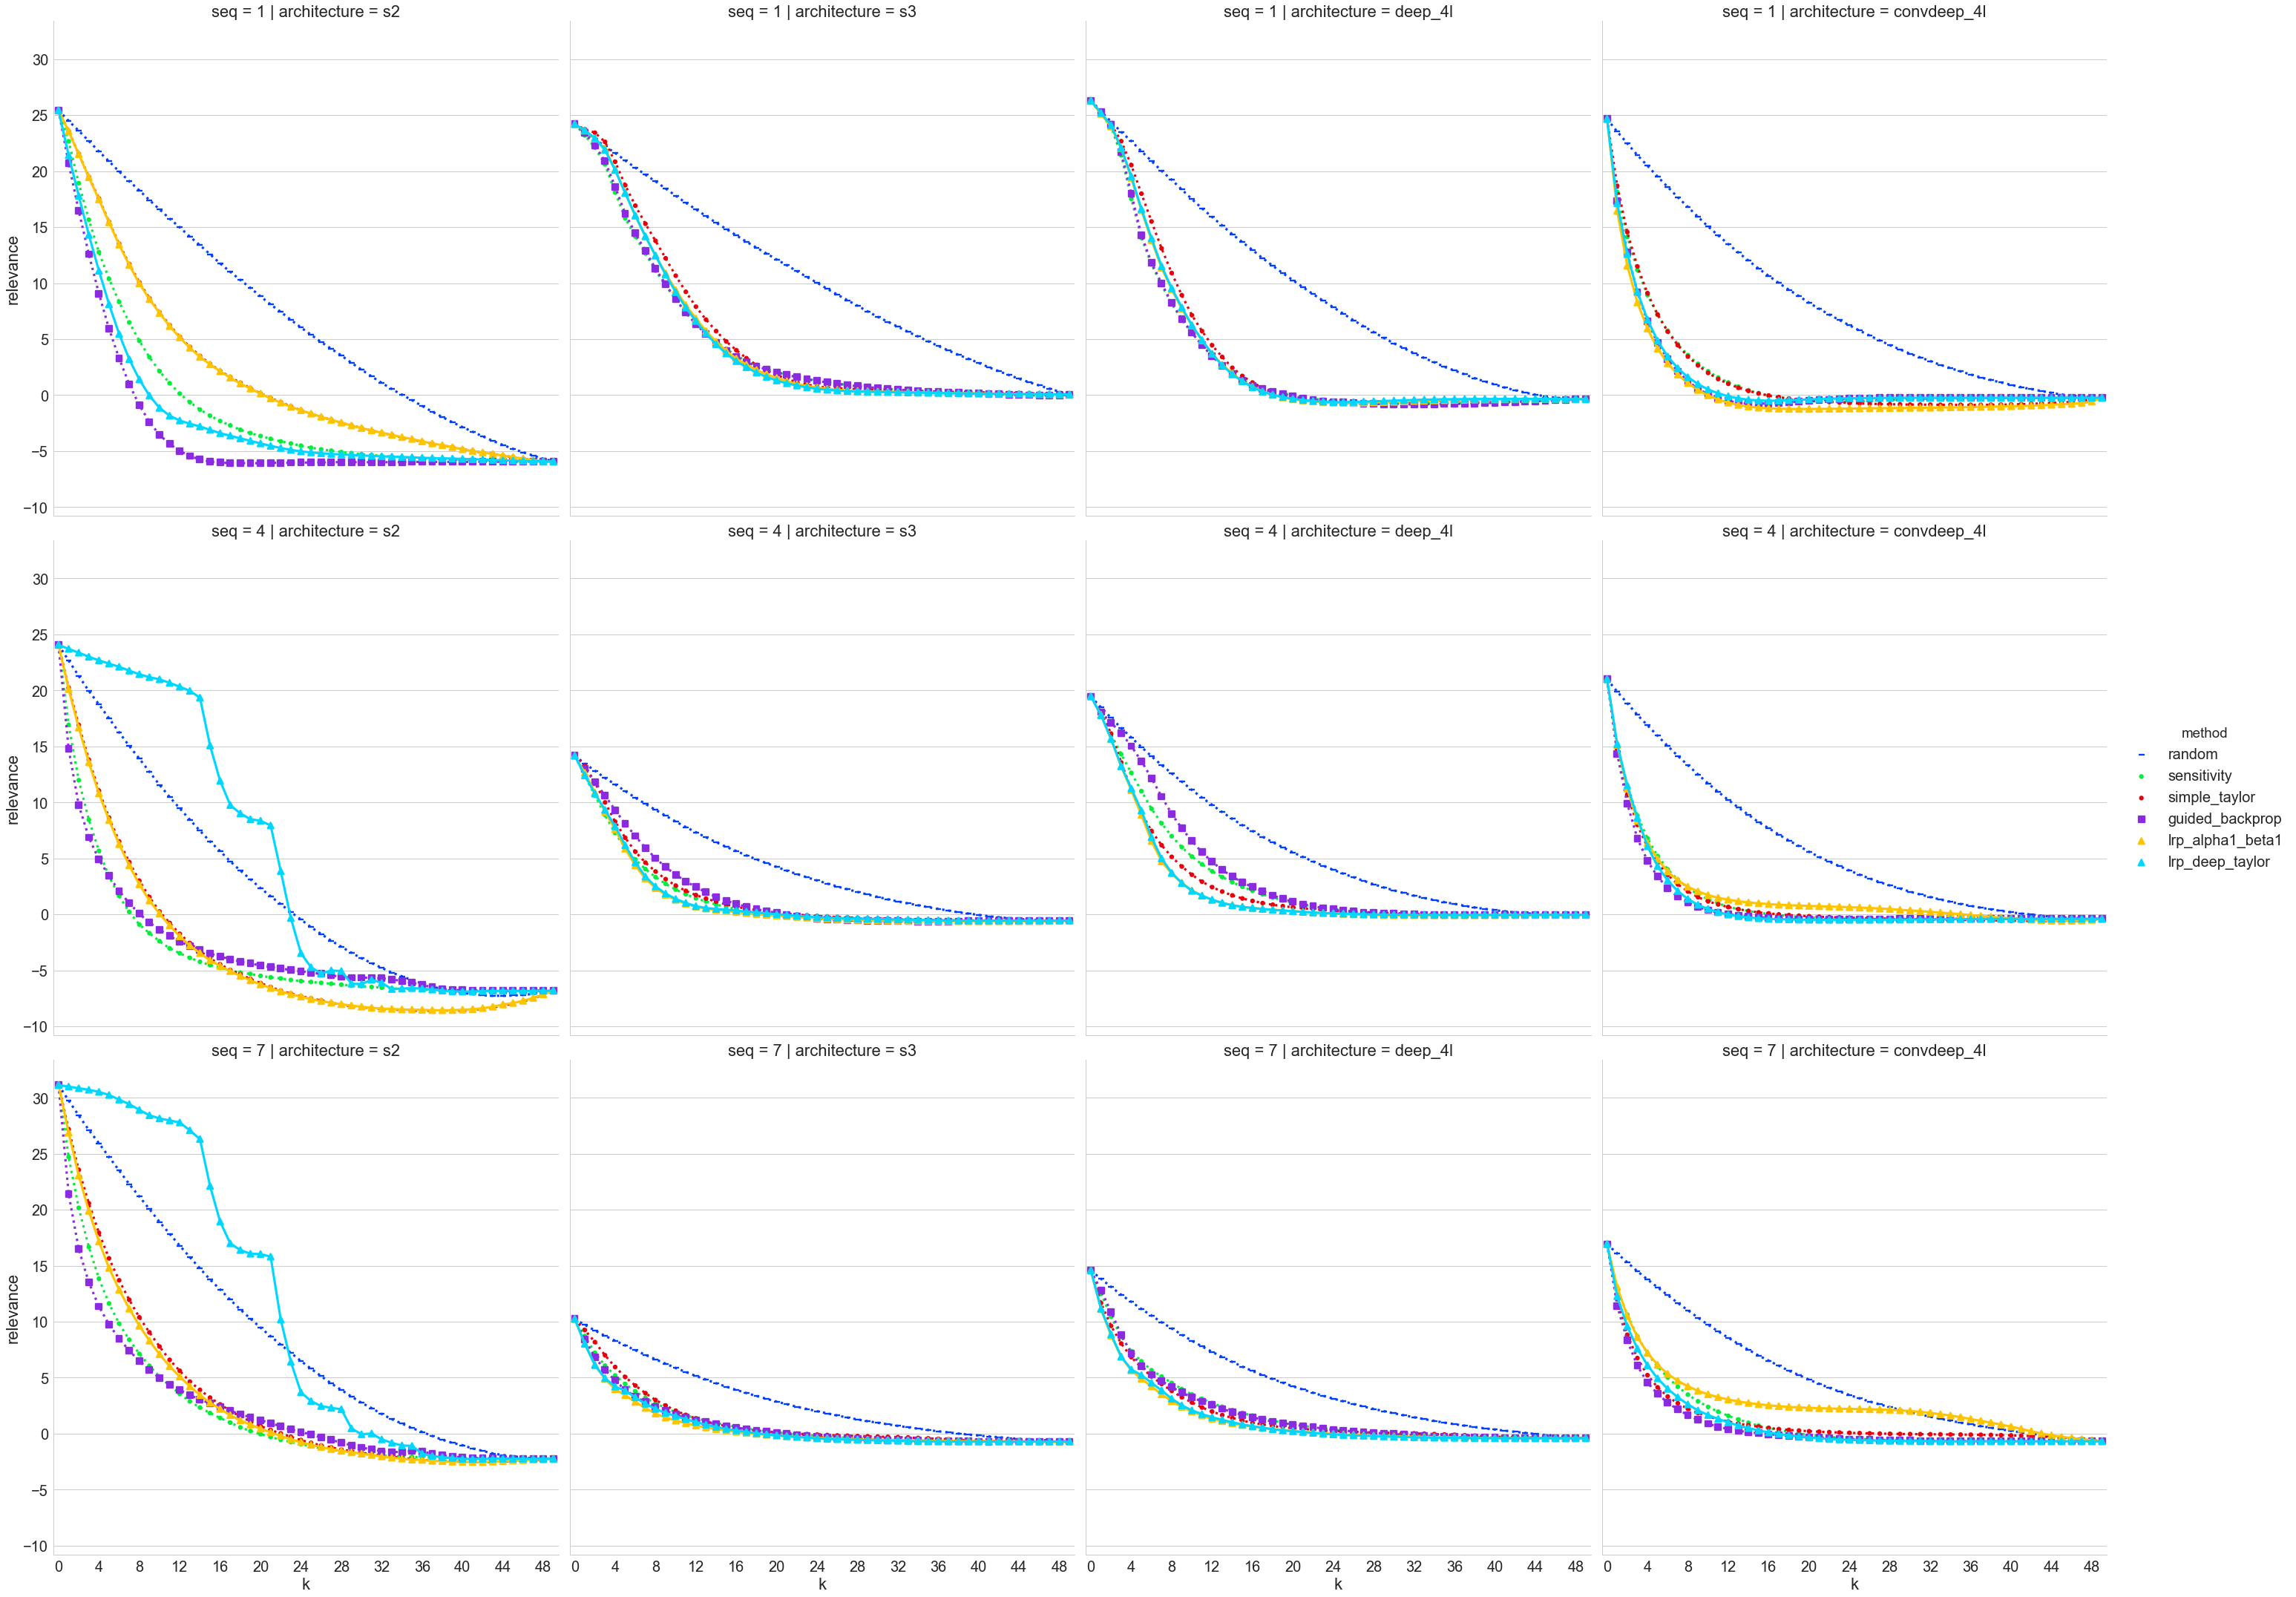

In [77]:
def get_auc(dataset, flip_function = 'minus_one'):
    file = "../stats/aopc-%s-using-%s-flip.pkl" %(dataset, flip_function)
    print('getting data from %s' % file)
    results = pickle.load(open(file, "rb"))
    
    total_k = len(results[0]['avg_relevance_at_k'])
    data = []
    for r in results:
        
        for i, rel in zip(range(total_k), r['avg_relevance_at_k']):
            d = dict(**r)
            d['k'] = i
            d['relevance'] = rel
            del d['avg_relevance_at_k']
            
            data.append(d)
    
    
    df = pd.DataFrame(data)
#     print(df[:60])
#     df = df[df.seq == 1]
    g = sns.factorplot(x="k", y="relevance", row='seq', col='architecture', hue="method",
                       data=df, markers=['_', '.', '.', 's', '^', '^', 'p'], linestyles=[':', ':', ':', ':', '-', '-'],
                       scatter_kws={'s': 0.5, 'alpha': 0.5}, line_kws={'alpha': .5, 'lw': 2}, size=10)

    xticks = np.arange(0, total_k, 4)


    g.set(xticks=xticks)
    g.set_xticklabels(xticks)

    
get_auc('mnist')

getting data from ../stats/aopc-fashion-mnist-using-minus_one-flip.pkl


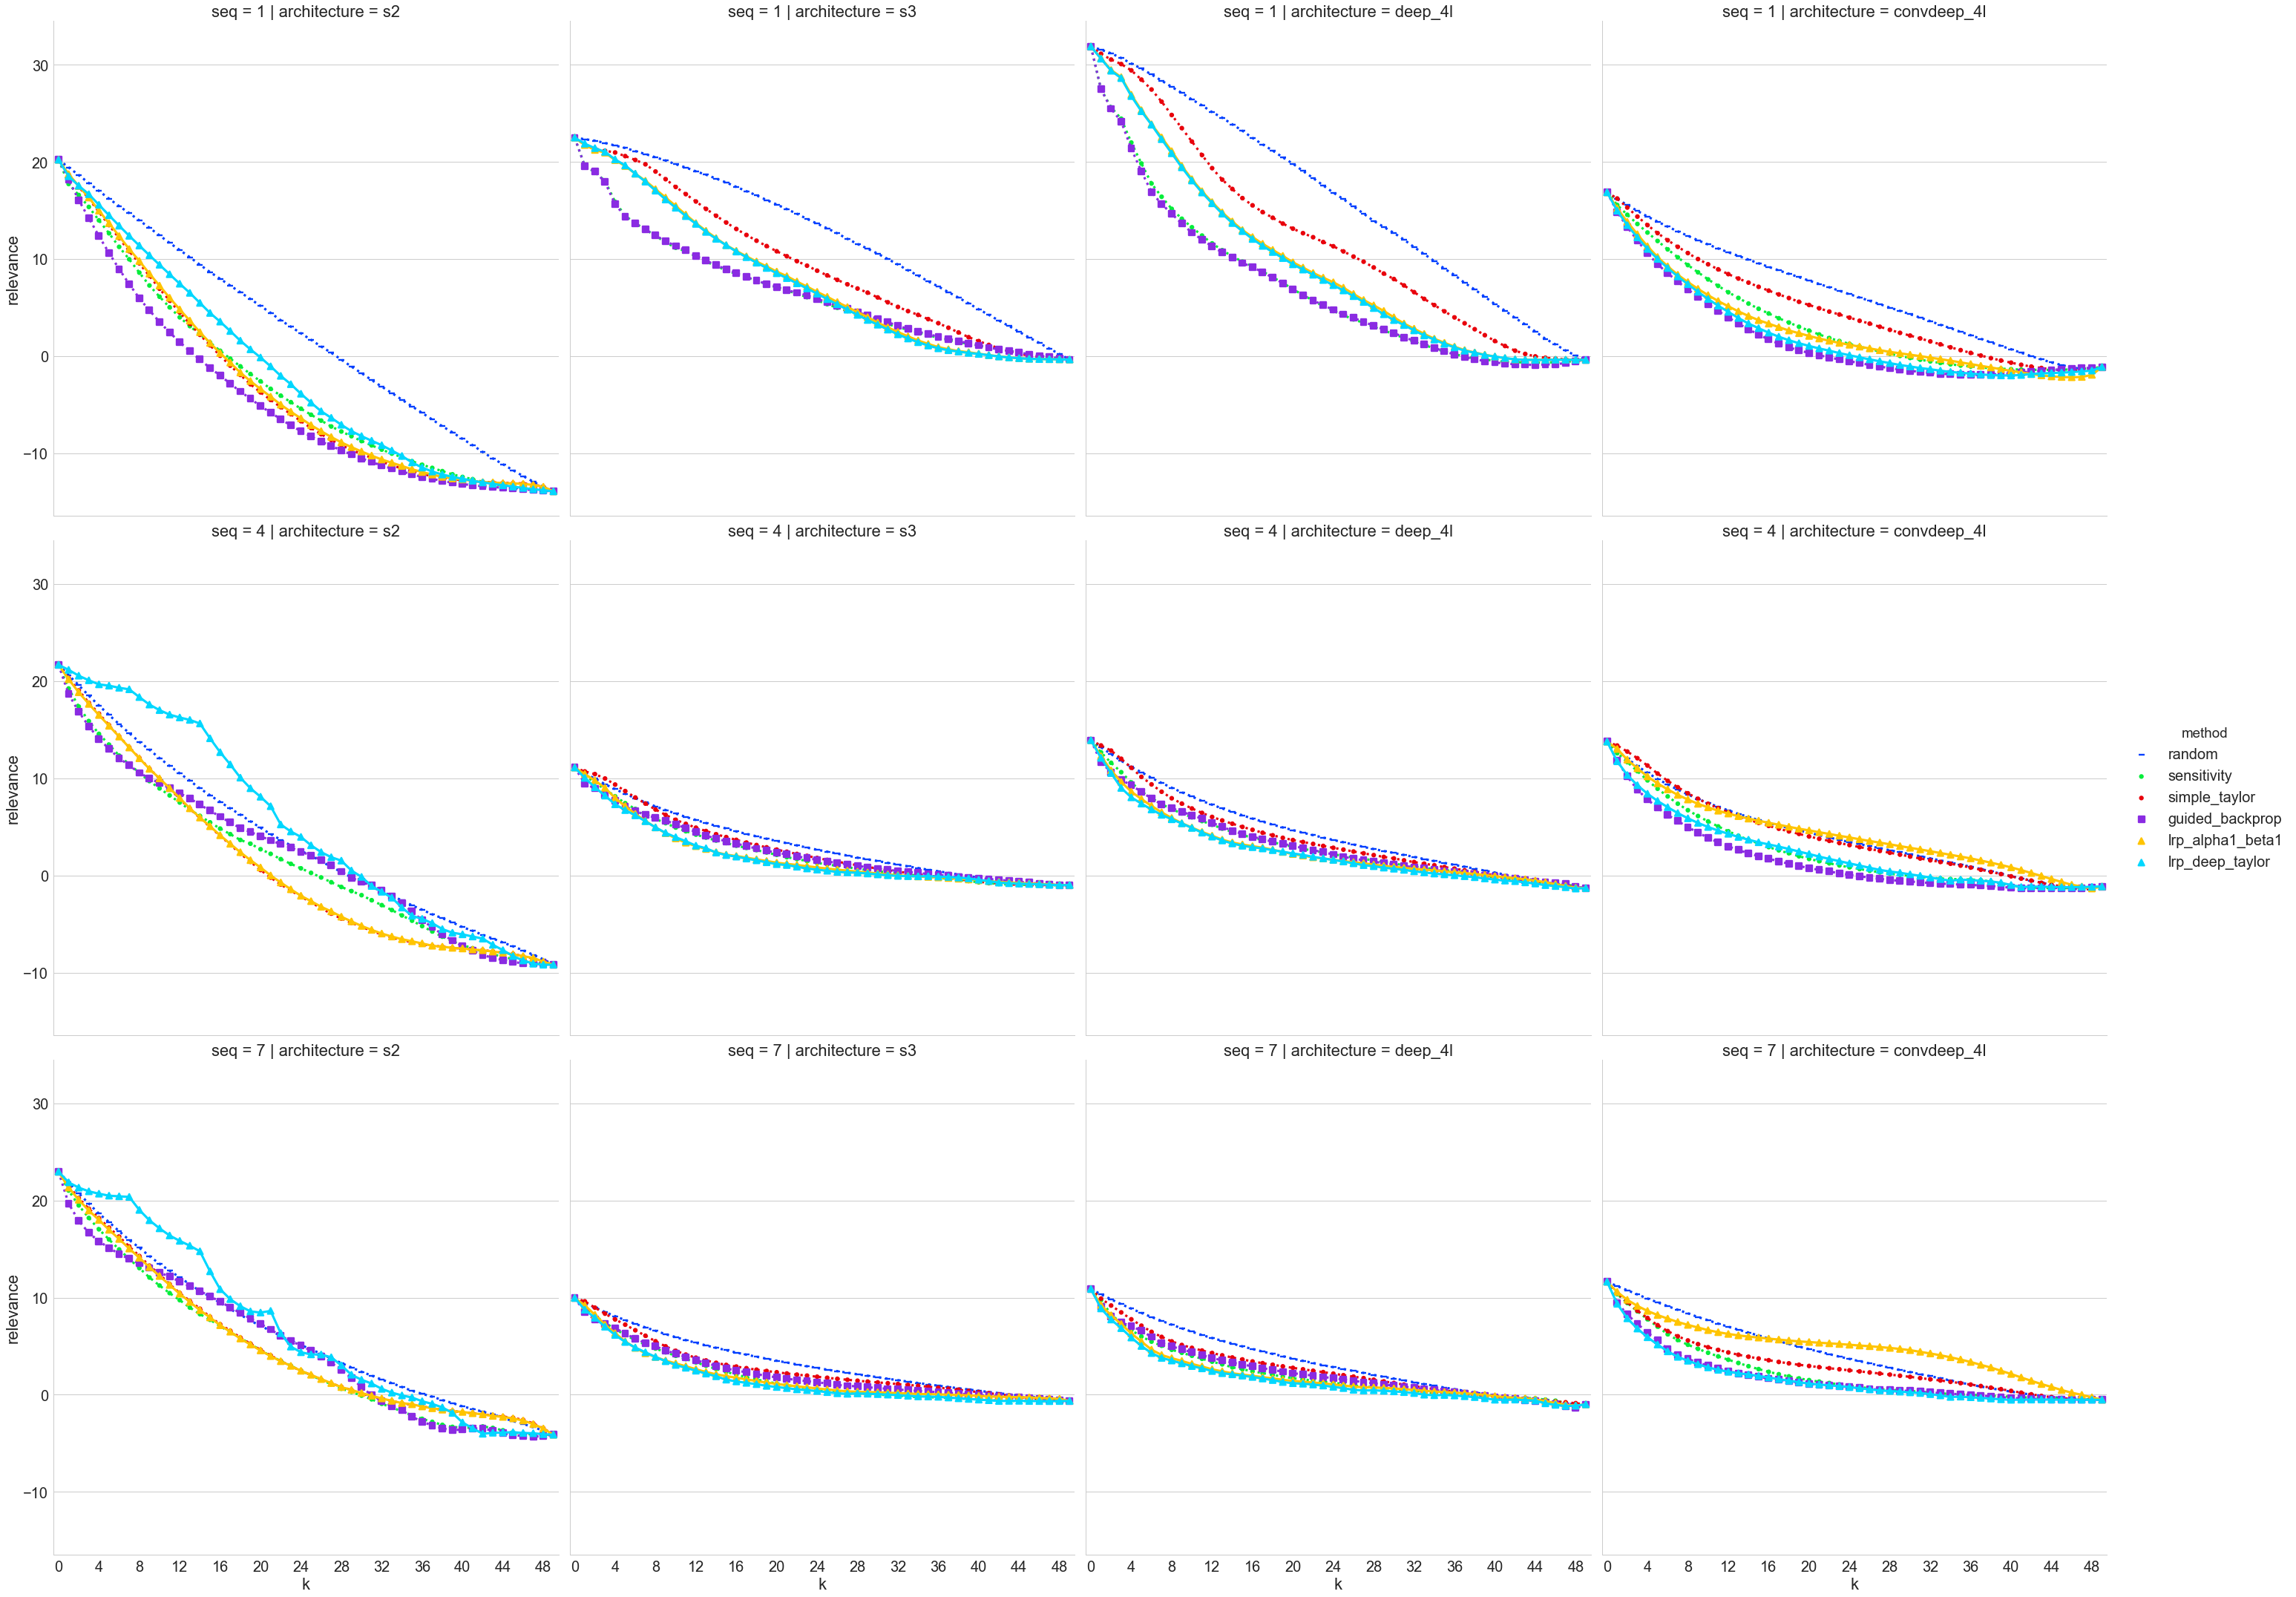

In [78]:
get_auc('fashion-mnist')